# IE6400 Foundations of Data Analytics Engineering - Section 1
# Project 1 - Crime Data Analysis

### Importing Libraries

In [205]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Inspection

In [206]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [207]:
print(df.dtypes)
print(df.columns)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc',

### Data Cleaning

In [208]:
missing_values = [0,'0','','-']
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv', na_values = missing_values)
df.drop_duplicates()
df['TIME OCC'] = (pd.to_datetime(df['TIME OCC']
                                             .fillna(0).astype(int).astype(str)  
                                             .str.zfill(4), format='%H%M', errors='coerce')
                              .dt.strftime('%H:%M')
                              .fillna('00:00'))

df['Mocodes'] = df['Mocodes'].astype(str).apply(lambda x : x.split())
df['Vict Age'] = df['Vict Age'].apply(lambda x : np.NaN if x<0 else x)
df['Crm Cds'] = df[['Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4']].values.tolist()
del df['Crm Cd 1']
del df['Crm Cd 2']
del df['Crm Cd 3']
del df['Crm Cd 4']
df['location'] = df[['LOCATION','Cross Street']].apply(lambda x : ', '.join(x[x.notnull()]), axis = 1)
del df['LOCATION']
del df['Cross Street']

df['Vict Age'] = df.groupby('Crm Cd', group_keys=False)['Vict Age'].apply(lambda x : x.fillna(x.median()))
df['Premis Cd'] = df.groupby('Crm Cd', group_keys=False)['Premis Cd'].apply(lambda x : x.fillna(x.mode()))
df['Premis Desc'] = df.groupby('Crm Cd', group_keys=False)['Premis Desc'].apply(lambda x : x.fillna(x.mode()))
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [209]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,Crm Cds,location
0,10304468,2020-01-08,2020-01-08,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0141,-118.2978,"[624.0, nan, nan, nan]",1100 W 39TH PL
1,190101086,2020-01-02,2020-01-01,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,34.0459,-118.2545,"[624.0, nan, nan, nan]",700 S HILL ST
2,200110444,2020-04-14,2020-02-13,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,34.0448,-118.2474,"[845.0, nan, nan, nan]",200 E 6TH ST
3,191501505,2020-01-01,2020-01-01,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,34.1685,-118.4019,"[745.0, 998.0, nan, nan]",5400 CORTEEN PL
4,191921269,2020-01-01,2020-01-01,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,34.2198,-118.4468,"[740.0, nan, nan, nan]",14400 TITUS ST


In [210]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age             117
Vict Sex          106525
Vict Descent      106534
Premis Cd              9
Premis Desc          479
Weapon Used Cd    528880
Weapon Desc       528880
Status                 0
Status Desc            0
LAT                 2263
LON                 2263
Crm Cds                0
location               0
dtype: int64

In [211]:
df = df.loc[~((df['Vict Age'].isnull())+(df['Premis Cd'].isnull())+(df['Premis Desc'].isnull()))]

In [212]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age               0
Vict Sex          106402
Vict Descent      106411
Premis Cd              0
Premis Desc            0
Weapon Used Cd    528456
Weapon Desc       528456
Status                 0
Status Desc            0
LAT                 2263
LON                 2263
Crm Cds                0
location               0
dtype: int64

### Extracting year, month, day and weekday from 'DATE OCC' column

In [213]:
df['year']=df['DATE OCC'].dt.year
df['month']=df['DATE OCC'].dt.strftime('%b')
df['month_num'] = df['DATE OCC'].dt.month
df['day']=df['DATE OCC'].dt.day
df['weekday']=df['DATE OCC'].dt.strftime('%A')
df['weekday_num'] = df['DATE OCC'].dt.strftime('%w')

In [214]:
df[['DATE OCC','year','month','month_num','day','weekday','weekday_num']].head()

,DATE OCC,year,month,month_num,day,weekday,weekday_num
0,2020-01-08,2020,Jan,1,8,Wednesday,3
1,2020-01-01,2020,Jan,1,1,Wednesday,3
2,2020-02-13,2020,Feb,2,13,Thursday,4
3,2020-01-01,2020,Jan,1,1,Wednesday,3
4,2020-01-01,2020,Jan,1,1,Wednesday,3


### Crime distribution across year

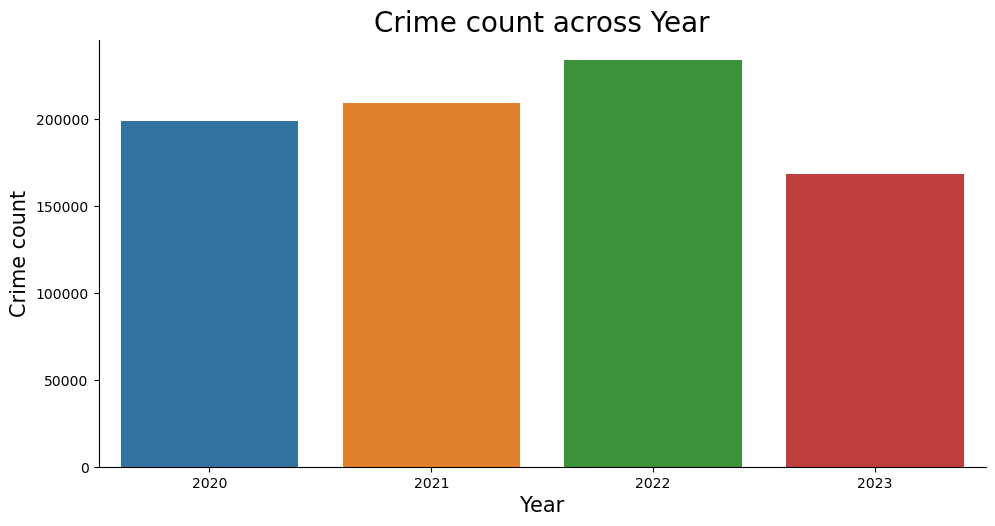

In [215]:
sns.catplot(x = "year", 
            data = df, 
            aspect = 2.0, 
            kind = "count")
plt.title('Crime count across Year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Crime count', fontsize = 15)
plt.show()

### Average monthly Crime Rate across years

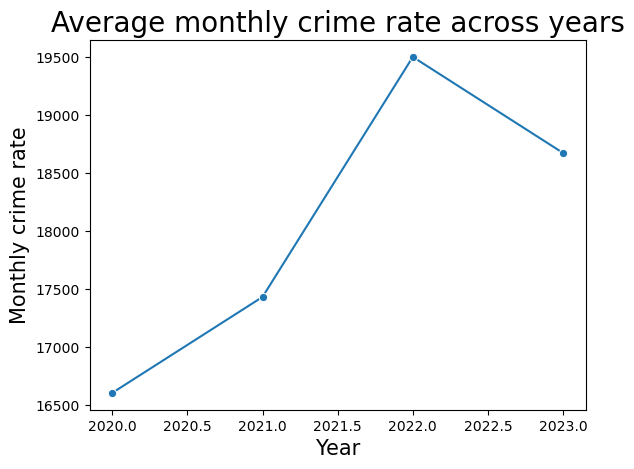

In [216]:
df_year = df.loc[df['DATE OCC'] < '2023-10-01'].groupby(['year','month_num'])['DR_NO'].count()
df_year = df_year.reset_index().rename(columns = {'DR_NO' : 'crime_count'})
df_year_grouped = df_year.groupby('year')['crime_count'].mean()
df_year_grouped = df_year_grouped.reset_index()
df_year_grouped['crime_count'] = df_year_grouped['crime_count'].round()

sns.lineplot(x = 'year', y = 'crime_count', data = df_year_grouped, marker = 'o')
plt.title('Average monthly crime rate across years', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Monthly crime rate', fontsize = 15)
plt.show()

### Crime distribution across months

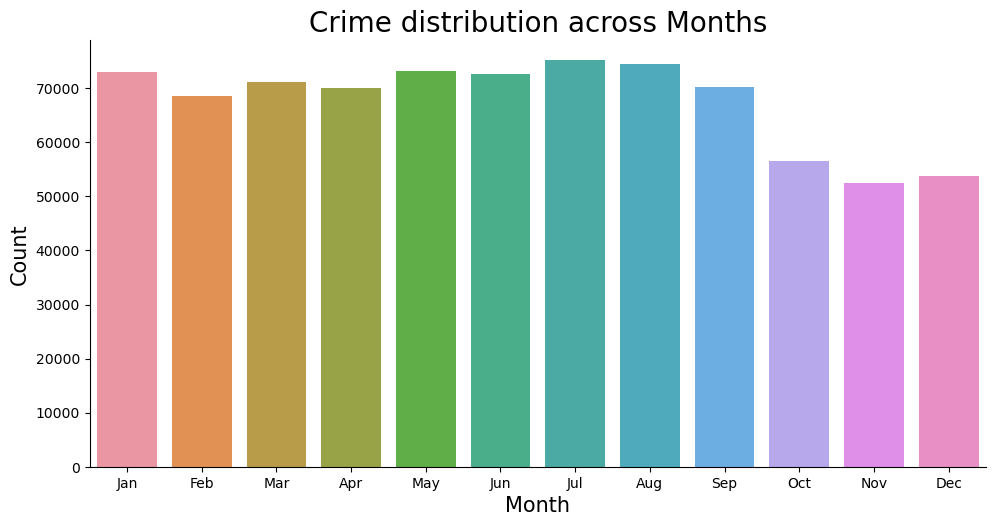

In [217]:
sns.catplot(x = "month",
            data = df.sort_values(by = 'month_num'), 
            aspect = 2.0, 
            kind = "count")
plt.title('Crime distribution across Months', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

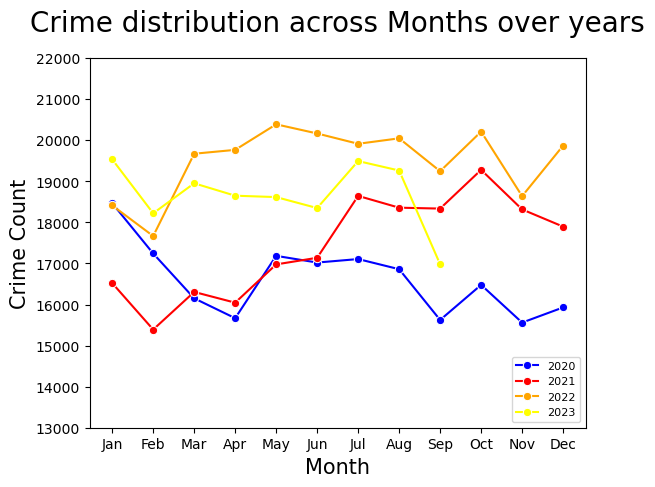

In [218]:
df_group = df.groupby(['year','month','month_num'])['DR_NO'].count()
df_group = df_group.reset_index().rename(columns = {'DR_NO' : 'crime_count'})
df_group = df_group.loc[~((df_group.year == 2023)&(df_group.month_num == 10))]

ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2020].sort_values(by = 'month_num'), color = 'blue', marker = 'o', label = '2020')
ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2021].sort_values(by = 'month_num'), color = 'red', marker = 'o', label = '2021')
ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2022].sort_values(by = 'month_num'), color = 'orange', marker = 'o', label = '2022')
ax = sns.lineplot(x = 'month', y = 'crime_count', data = df_group.loc[df_group.year == 2023].sort_values(by = 'month_num'), color = 'yellow', marker = 'o', label = '2023')

ax.set_ylim(13000,22000)
plt.legend(fontsize = 8, loc = 'lower right')
plt.title('Crime distribution across Months over years', fontsize = 20, y=1.05)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.show()

C:\Users\karni\AppData\Local\Temp\ipykernel_25240\2049772746.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 8)


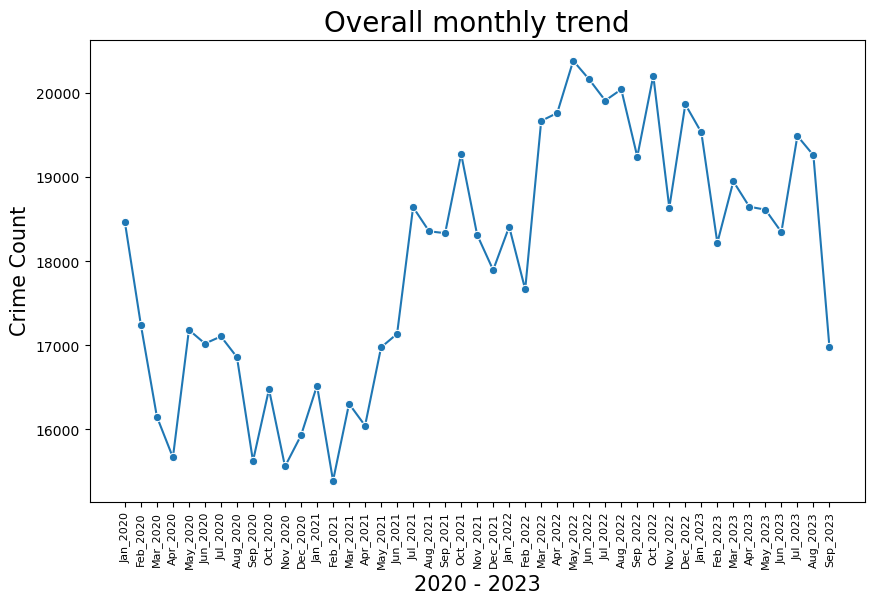

In [219]:
df_group['month_year'] = df_group['month'].astype(str) +'_'+ df_group['year'].astype(str)
plt.figure(figsize = (10,6))
plot = sns.lineplot(x = 'month_year', y = 'crime_count', data = df_group.sort_values(by = ['year','month_num']), marker = 'o')
plt.xlabel('2020 - 2023', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.title('Overall monthly trend', fontsize = 20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 8)
plt.show()

### Effects of Major events or Economic factors
#### Major earthquakes in LA since 2020

C:\Users\karni\AppData\Local\Temp\ipykernel_25240\754782255.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 30, fontsize = 6)
C:\Users\karni\AppData\Local\Temp\ipykernel_25240\754782255.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(plot2.get_xticklabels(), rotation = 30, fontsize = 6)
C:\Users\karni\AppData\Local\Temp\ipykernel_25240\754782255.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot3.set_xticklabels(plot3.get_xticklabels(), rotation = 30, fontsize = 6)
C:\Users\karni\AppData\Local\Temp\ipykernel_25240\754782255.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot4.set_xticklabels(plot4.get_xticklabels(), rotation = 30, fontsize = 6)


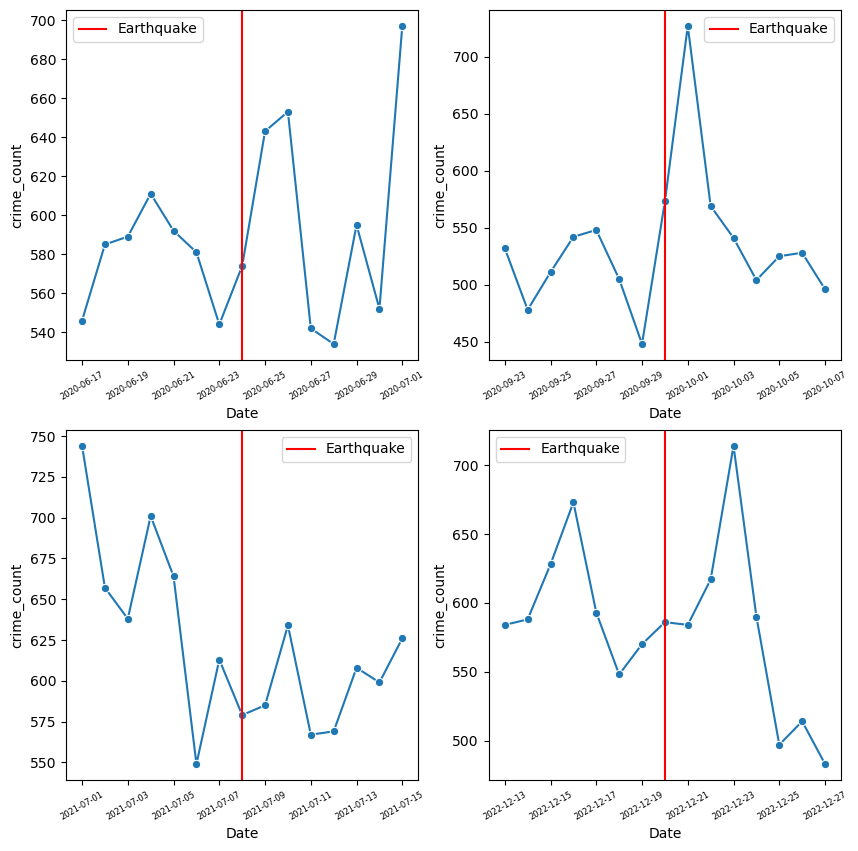

In [220]:
date_e2 = '2020-06-24'
date_e2_s = '2020-06-17'
date_e2_f = '2020-07-01'

df_e2 = df.loc[(df['DATE OCC'] >= date_e2_s)&(df['DATE OCC'] <= date_e2_f)]['DATE OCC'].value_counts()
df_e2 = df_e2.reset_index().rename(columns = {'index' : 'Date', 'DATE OCC' : 'crime_count'})

date_e3 = '2020-09-30'
date_e3_s = '2020-09-23'
date_e3_f = '2020-10-07'

df_e3 = df.loc[(df['DATE OCC'] >= date_e3_s)&(df['DATE OCC'] <= date_e3_f)]['DATE OCC'].value_counts()
df_e3 = df_e3.reset_index().rename(columns = {'index' : 'Date', 'DATE OCC' : 'crime_count'})

date_e4 = '2021-07-08'
date_e4_s = '2021-07-01'
date_e4_f = '2021-07-15'

df_e4 = df.loc[(df['DATE OCC'] >= date_e4_s)&(df['DATE OCC'] <= date_e4_f)]['DATE OCC'].value_counts()
df_e4 = df_e4.reset_index().rename(columns = {'index' : 'Date', 'DATE OCC' : 'crime_count'})

date_e5 = '2022-12-20'
date_e5_s = '2022-12-13'
date_e5_f = '2022-12-27'

df_e5 = df.loc[(df['DATE OCC'] >= date_e5_s)&(df['DATE OCC'] <= date_e5_f)]['DATE OCC'].value_counts()
df_e5 = df_e5.reset_index().rename(columns = {'index' : 'Date', 'DATE OCC' : 'crime_count'})

fig, axes = plt.subplots(2,2, figsize = (10,10))

plot1 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e2, marker = 'o', ax = axes[0][0])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 30, fontsize = 6)
plot1.axvline(x = datetime.date(2020,6,24), color = 'red', label = 'Earthquake')
plot1.legend()
plot2 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e3, marker = 'o', ax = axes[0][1])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation = 30, fontsize = 6)
plot2.axvline(x = datetime.date(2020,9,30), color = 'red', label = 'Earthquake')
plot2.legend()
plot3 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e4, marker = 'o', ax = axes[1][0])
plot3.set_xticklabels(plot3.get_xticklabels(), rotation = 30, fontsize = 6)
plot3.axvline(x = datetime.date(2021,7,8), color = 'red', label = 'Earthquake')
plot3.legend()
plot4 = sns.lineplot(x = 'Date', y = 'crime_count', data = df_e5, marker = 'o', ax = axes[1][1])
plot4.set_xticklabels(plot4.get_xticklabels(), rotation = 30, fontsize = 6)
plot4.axvline(x = datetime.date(2022,12,20), color = 'red', label = 'Earthquake')
plot4.legend()
plt.show()

#### Recession

C:\Users\karni\AppData\Local\Temp\ipykernel_25240\1623982158.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 45, fontsize = 8)


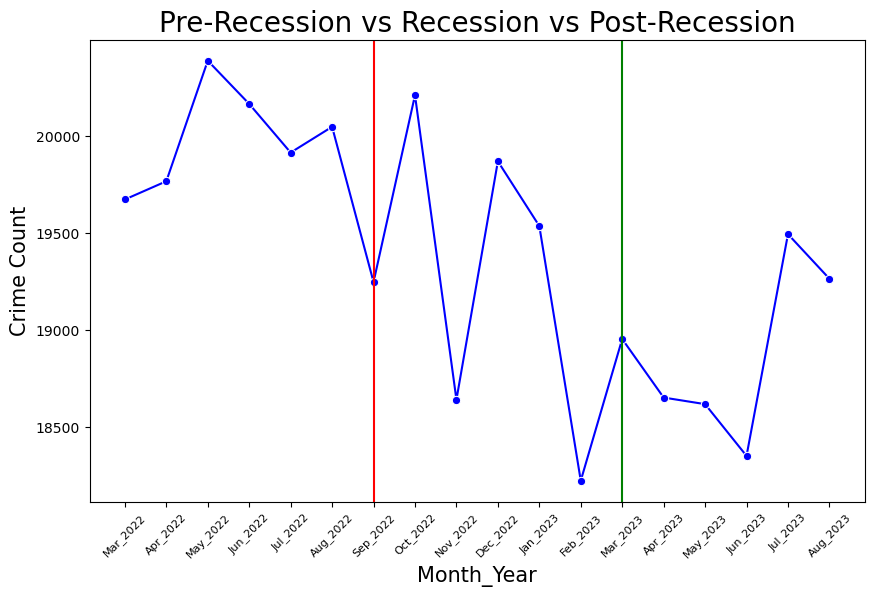

In [221]:
date_pre_rec = '2022-03-01'
date_rec_1 = '2022-09-01'
date_rec_2 = '2023-03-01'
date_post_rec = '2023-08-31'

df_rec = df.loc[(df['DATE OCC'] >= date_pre_rec)&(df['DATE OCC'] <= date_post_rec)]
df_rec = df_rec.groupby(['year','month','month_num'])['DR_NO'].count()
df_rec = df_rec.reset_index().rename(columns = {'DR_NO' : 'crime_count'})
df_rec['month_year'] = df_rec['month'].astype(str) +'_'+ df_rec['year'].astype(str)

plt.figure(figsize = (10,6))
plot = sns.lineplot(x = 'month_year', y = 'crime_count', data = df_rec.sort_values(by = ['year','month_num']), marker = 'o', color = 'blue')
plt.xlabel('Month_Year', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.title('Pre-Recession vs Recession vs Post-Recession', fontsize = 20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45, fontsize = 8)
plot.axvline(x = 'Sep_2022', color = 'red', label = 'Recession Start')
plot.axvline(x = 'Mar_2023', color = 'green', label = 'Recession End')

plt.show()

#### Covid-19

C:\Users\karni\AppData\Local\Temp\ipykernel_25240\2529910305.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 8)


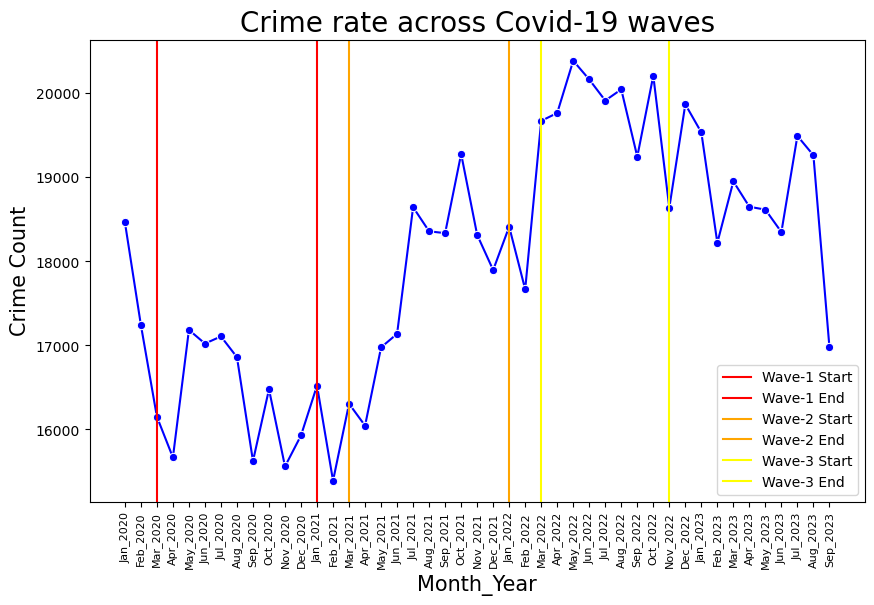

In [222]:
date_w1_start = '2020-03-01'
date_w1_end = '2021-01-31'
date_w2_start = '2021-03-01'
date_w2_end = '2022-01-31'
date_w3_start = '2022-03-01'
date_w3_end = '2022-10-31'

df_cov = df.loc[df['DATE OCC'] < '2023-10-01']
df_cov = df_cov.groupby(['year','month','month_num'])['DR_NO'].count()
df_cov = df_cov.reset_index().rename(columns = {'DR_NO' : 'crime_count'})
df_cov['month_year'] = df_cov['month'].astype(str) +'_'+ df_cov['year'].astype(str)

plt.figure(figsize = (10,6))
plot = sns.lineplot(x = 'month_year', y = 'crime_count', data = df_cov.sort_values(by = ['year','month_num']), marker = 'o', color = 'blue')
plt.xlabel('Month_Year', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.title('Crime rate across Covid-19 waves', fontsize = 20)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 8)
plot.axvline(x = 'Mar_2020', color = 'red', label = 'Wave-1 Start')
plot.axvline(x = 'Jan_2021', color = 'red', label = 'Wave-1 End')
plot.axvline(x = 'Mar_2021', color = 'orange', label = 'Wave-2 Start')
plot.axvline(x = 'Jan_2022', color = 'orange', label = 'Wave-2 End')
plot.axvline(x = 'Mar_2022', color = 'yellow', label = 'Wave-3 Start')
plot.axvline(x = 'Nov_2022', color = 'yellow', label = 'Wave-3 End')

plt.legend()
plt.show()

### Crime distribution across weekdays

Friday       123743
Saturday     118511
Wednesday    115203
Monday       114889
Thursday     114456
Sunday       113086
Tuesday      111179
Name: weekday, dtype: int64


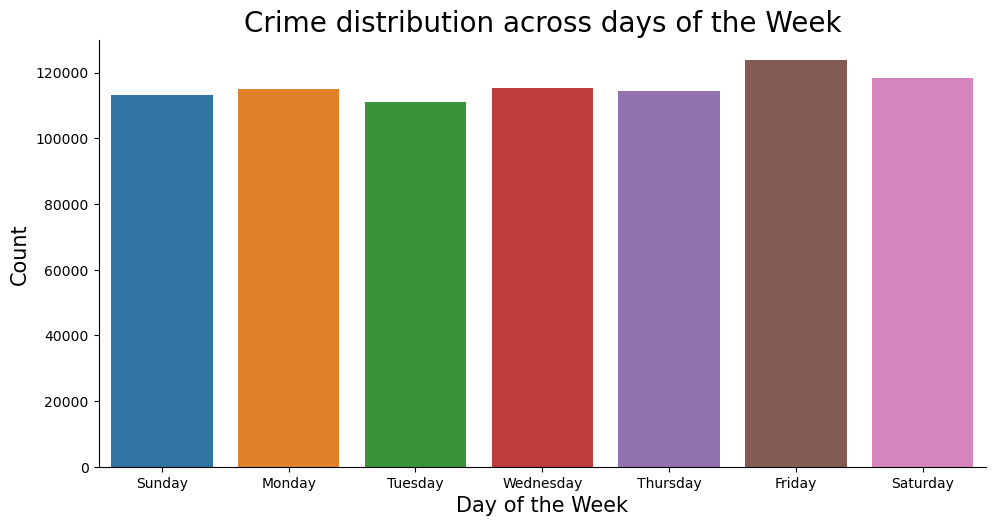

In [223]:
print(df['weekday'].value_counts())
sns.catplot(x = "weekday", 
            data = df.sort_values(by = 'weekday_num'), 
            aspect = 2.0, 
            kind = "count")
plt.title('Crime distribution across days of the Week', fontsize = 20)
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### Crime distribution across different timeframes in a day

In [224]:
def time_bin(x) :
    if x.time() < datetime.time(2) :
        return '00:00-02:00'
    elif x.time() < datetime.time(4) :
        return '02:00-04:00'
    elif x.time() < datetime.time(6) : 
        return '04:00-06:00'
    elif x.time() < datetime.time(8) :
        return '06:00-08:00'
    elif x.time() < datetime.time(10) :
        return '08:00-10:00'
    elif x.time() < datetime.time(12) :
        return '10:00-12:00'
    elif x.time() < datetime.time(14) :
        return '12:00-14:00'
    elif x.time() < datetime.time(16) :
        return '14:00-16:00'
    elif x.time() < datetime.time(18) :
        return '16:00-18:00'
    elif x.time() < datetime.time(20) :
        return '18:00-20:00'
    elif x.time() < datetime.time(22) :
        return '20:00-22:00'
    else :
        return '22:00-00:00'

In [225]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'])
df['time_bin'] = df['TIME OCC'].apply(time_bin)
df['TIME OCC'] = df['TIME OCC'].dt.strftime('%H:%M')
df[['TIME OCC','time_bin']]

,TIME OCC,time_bin
0,22:30,22:00-00:00
1,03:30,02:00-04:00
2,12:00,12:00-14:00
3,17:30,16:00-18:00
4,04:15,04:00-06:00
...,...,...
811658,18:00,18:00-20:00
811659,10:00,10:00-12:00
811660,16:30,16:00-18:00
811661,00:01,00:00-02:00


18:00-20:00    92538
12:00-14:00    91667
16:00-18:00    89688
20:00-22:00    86257
14:00-16:00    81774
22:00-00:00    73927
10:00-12:00    69878
08:00-10:00    59158
00:00-02:00    58202
06:00-08:00    39624
02:00-04:00    38891
04:00-06:00    29463
Name: time_bin, dtype: int64


C:\Users\karni\AppData\Local\Temp\ipykernel_25240\2942303701.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  weekday_plot.set_xticklabels(weekday_plot.get_xticklabels(), rotation = 45, fontsize = 8)


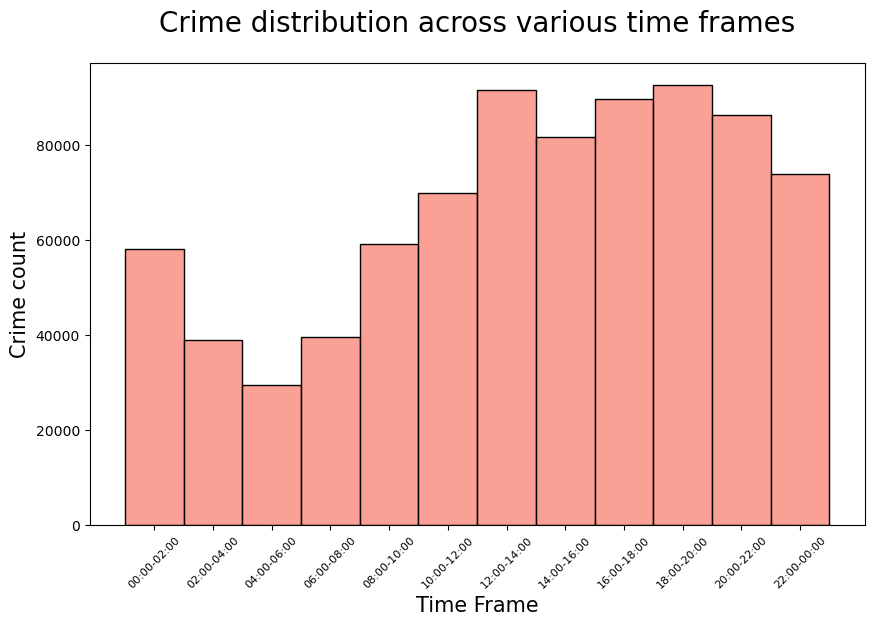

In [226]:
print(df['time_bin'].value_counts())
plt.figure(figsize = (10,6))
weekday_plot = sns.histplot(x = 'time_bin', data = df.sort_values(by = 'TIME OCC'), color = 'salmon')
weekday_plot.set_xticklabels(weekday_plot.get_xticklabels(), rotation = 45, fontsize = 8)
plt.title('Crime distribution across various time frames', fontsize = 20, y=1.05)
plt.xlabel('Time Frame', fontsize = 15)
plt.ylabel('Crime count', fontsize = 15)
plt.show()

### Top 10 Crime types

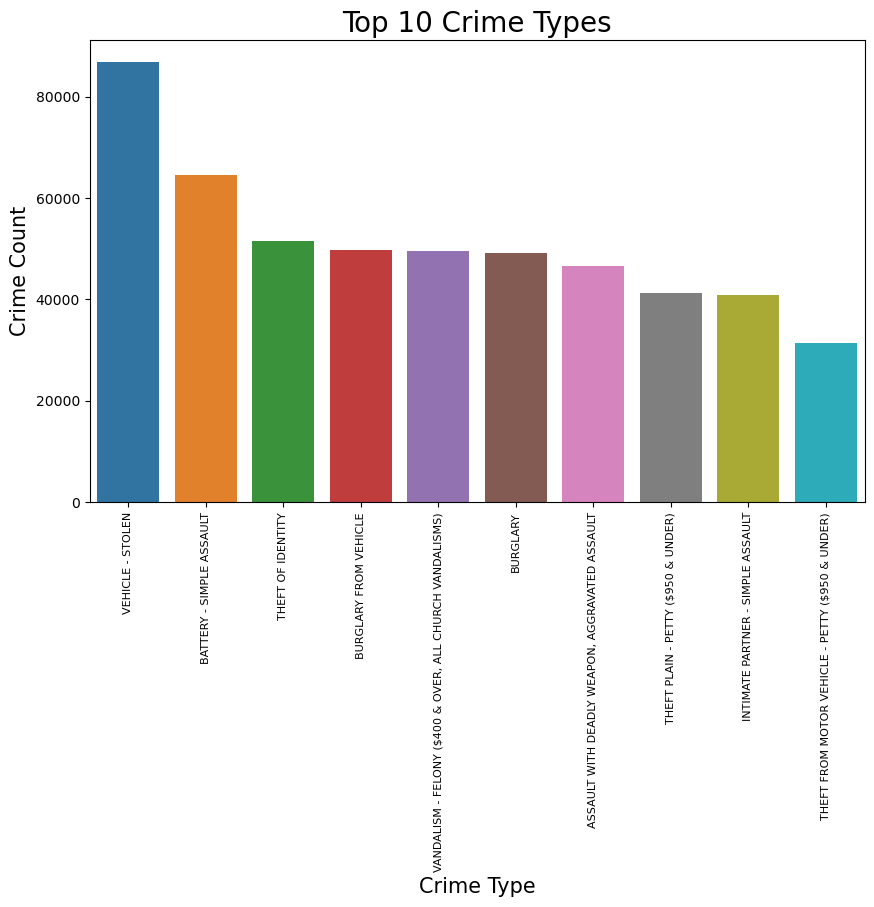

In [227]:
df_crime_types = df['Crm Cd Desc'].value_counts()
df_crime_types = df_crime_types.reset_index().rename(columns = {'Crm Cd Desc' : 'crime_count', 'index' : 'crime_type'})

plt.figure(figsize = (10,6))
crime_plot = sns.barplot(x = 'crime_type', y = 'crime_count', data = df_crime_types[:10])
crime_plot.set_xticklabels(crime_plot.get_xticklabels(), rotation = 90, fontsize = 8)
plt.title('Top 10 Crime Types', fontsize = 20)
plt.xlabel('Crime Type', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.show()

### Grouping the crime types

In [228]:
crime_groups = pd.read_csv('IE6400_Project_1_Crime_Groups.csv')
print(crime_groups.head())
print(crime_groups.describe())

                                         Crm Cd Desc           Group
0                           BATTERY - SIMPLE ASSAULT         Assault
1          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  Sexual Offence
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       Vandalism
3  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...       Vandalism
4                                     RAPE, FORCIBLE  Sexual Offence
                     Crm Cd Desc  Group
count                        138    138
unique                       138     13
top     BATTERY - SIMPLE ASSAULT  Other
freq                           1     37


In [229]:
df = df.merge(crime_groups, on = 'Crm Cd Desc')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cds,location,year,month,month_num,day,weekday,weekday_num,time_bin,Group
0,10304468,2020-01-08,2020-01-08,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,"[624.0, nan, nan, nan]",1100 W 39TH PL,2020,Jan,1,8,Wednesday,3,22:00-00:00,Assault
1,190101086,2020-01-02,2020-01-01,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,"[624.0, nan, nan, nan]",700 S HILL ST,2020,Jan,1,1,Wednesday,3,02:00-04:00,Assault
2,200815333,2020-10-15,2020-10-15,20:00,8,West LA,814,2,624,BATTERY - SIMPLE ASSAULT,...,"[624.0, nan, nan, nan]",100 S ACARI DR,2020,Oct,10,15,Thursday,4,20:00-22:00,Assault
3,200914052,2020-08-27,2020-08-27,12:55,9,Van Nuys,935,2,624,BATTERY - SIMPLE ASSAULT,...,"[624.0, nan, nan, nan]",14100 SYLVAN ST,2020,Aug,8,27,Thursday,4,12:00-14:00,Assault
4,200810920,2020-06-20,2020-06-20,10:00,8,West LA,841,2,624,BATTERY - SIMPLE ASSAULT,...,"[624.0, nan, nan, nan]",12100 SANTA MONICA BL,2020,Jun,6,20,Saturday,6,10:00-12:00,Assault


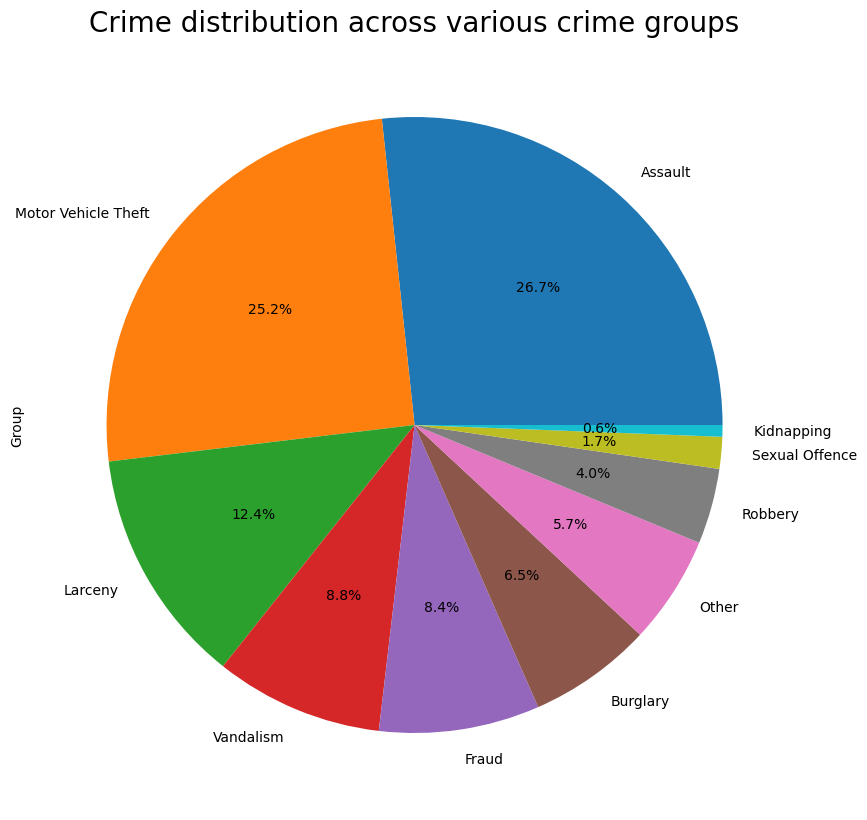

In [230]:
plt.figure(figsize = (10,10))
df['Group'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Crime distribution across various crime groups', fontsize = 20)
plt.show()

### Boxplot for Victim Age across various Crime Groups

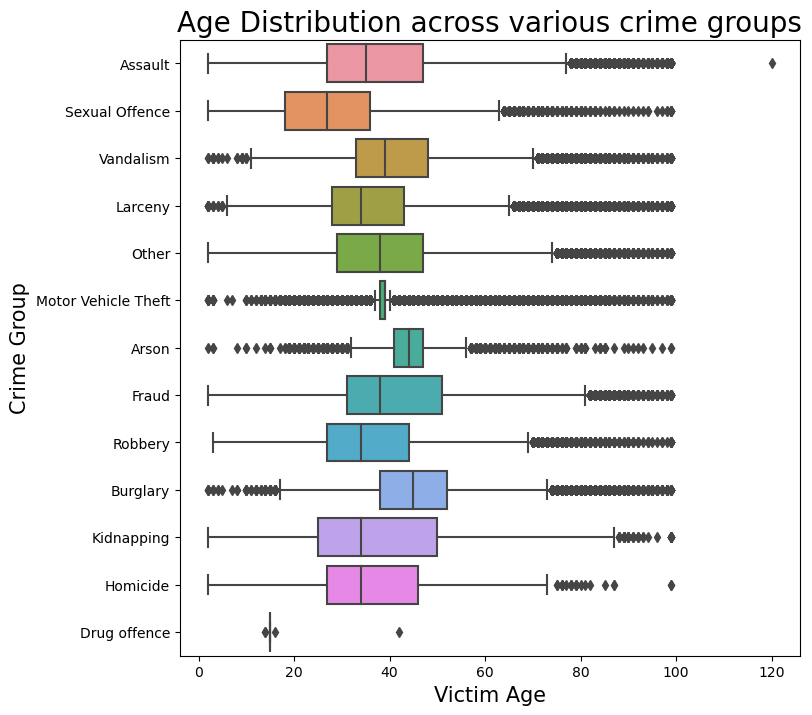

In [231]:
plt.figure(figsize = (8,8))
boxplt = sns.boxplot(data = df, x = 'Vict Age', y = 'Group')
plt.title('Age Distribution across various crime groups', fontsize = 20)
plt.xlabel('Victim Age', fontsize = 15)
plt.ylabel('Crime Group', fontsize = 15)
plt.show()

### Boxplot for Victim Age across various Victim Descents

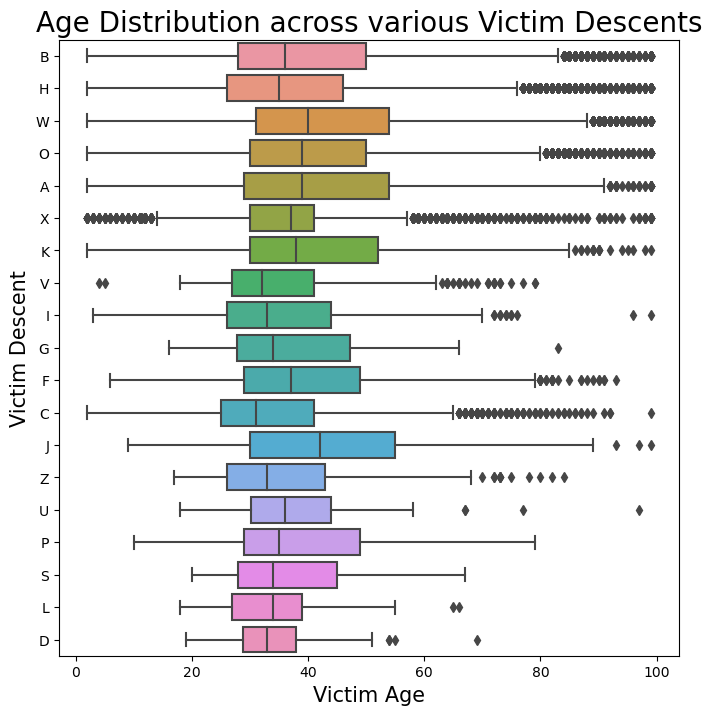

In [232]:
plt.figure(figsize = (8,8))
boxplt = sns.boxplot(data = df, x = 'Vict Age', y = 'Vict Descent')
plt.title('Age Distribution across various Victim Descents', fontsize = 20)
plt.xlabel('Victim Age', fontsize = 15)
plt.ylabel('Victim Descent', fontsize = 15)
plt.show()

### Boxplot for Victim Age across various Victim Sexes

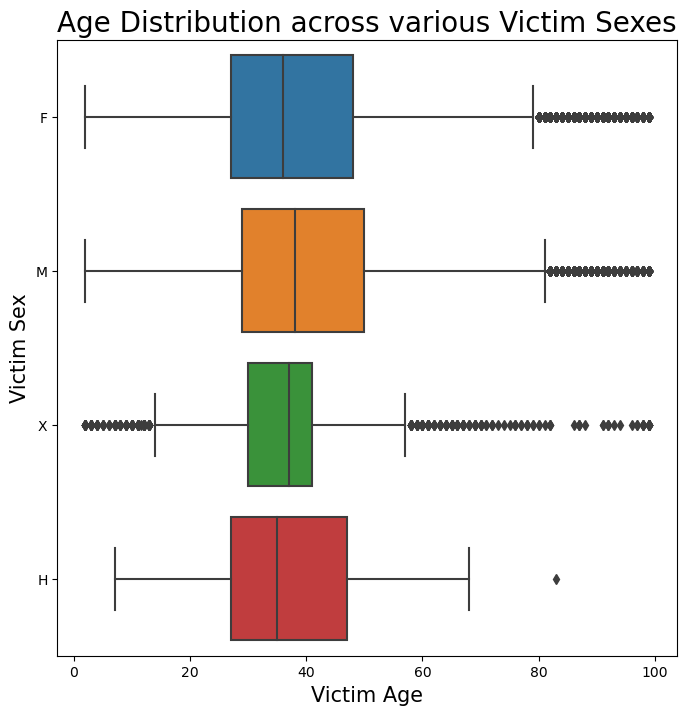

In [233]:
plt.figure(figsize = (8,8))
boxplt = sns.boxplot(data = df, x = 'Vict Age', y = 'Vict Sex')
plt.title('Age Distribution across various Victim Sexes', fontsize = 20)
plt.xlabel('Victim Age', fontsize = 15)
plt.ylabel('Victim Sex', fontsize = 15)
plt.show()

### Crime distribution across various locations

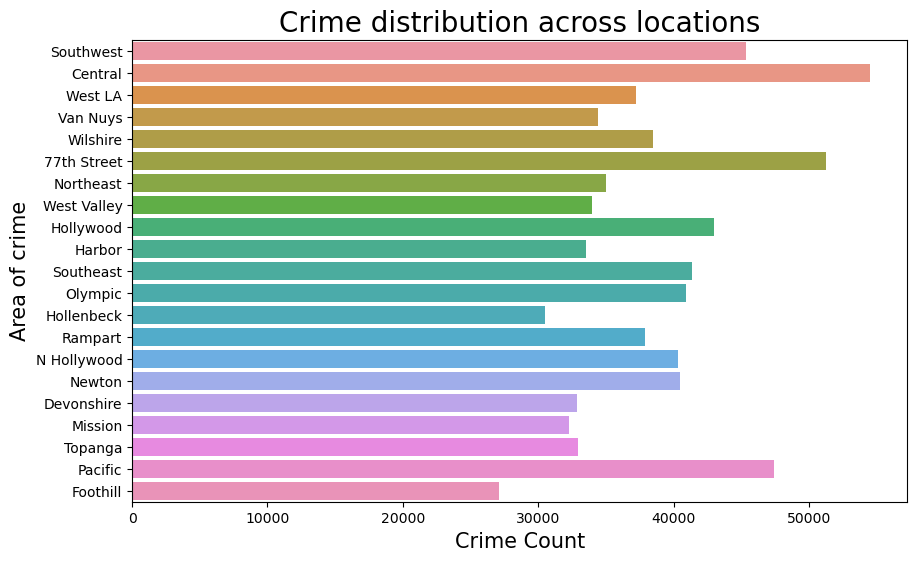

In [234]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, y='AREA NAME')
plt.title('Crime distribution across locations', fontsize = 20)
plt.xlabel('Crime Count', fontsize = 15)
plt.ylabel('Area of crime', fontsize = 15)
plt.show()

### Crime heatmap

In [235]:
import folium
from folium.plugins import HeatMap
df_latlong = df[['LAT','LON']].value_counts()
df_latlong = df_latlong.reset_index().rename(columns = {'0' : 'count'})
map = folium.Map(location=[34.073524, -118.354065], zoom_start=10)
HeatMap(df_latlong).add_to(map)
map

### Crime distribution across Victim's ages

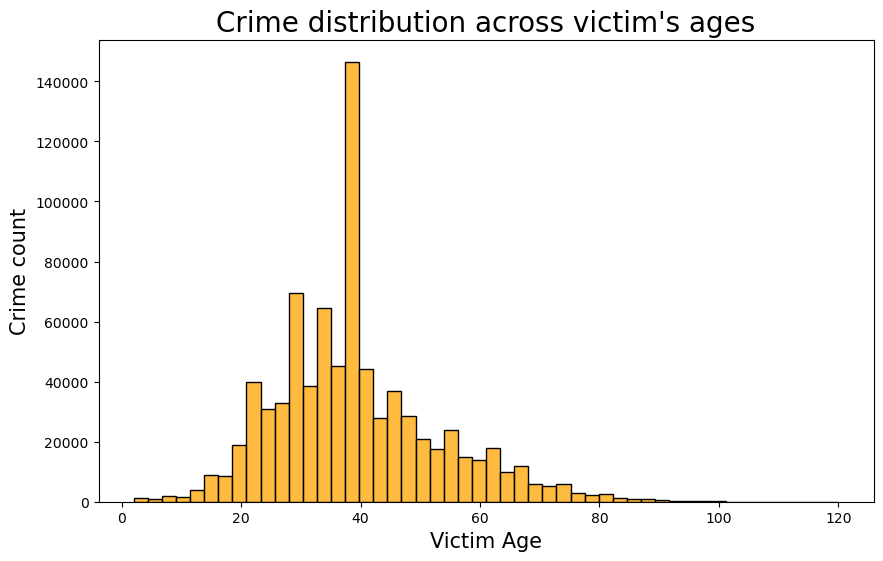

In [236]:
plt.figure(figsize = (10,6))
sns.histplot(df['Vict Age'],
             bins = 50, color = 'orange')
plt.title('Crime distribution across victim\'s ages', fontsize = 20)
plt.xlabel('Victim Age', fontsize = 15)
plt.ylabel('Crime count', fontsize = 15)
plt.show()

### Crime distribution across Victim's sexes

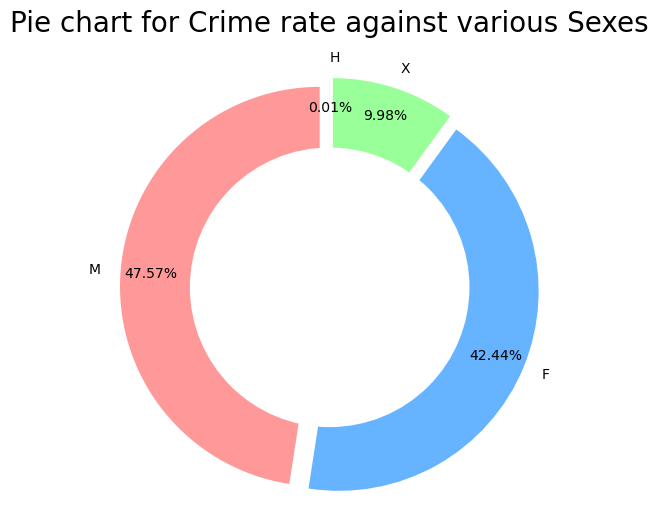

In [237]:
sex = df['Vict Sex'].value_counts().reset_index().rename(columns = {'index':'sex','Vict Sex':'Crime Count'})
labels = sex['sex']
sex['size'] = sex['Crime Count']/(sex['Crime Count'].sum())*100
sizes = sex['size']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  

plt.tight_layout()
plt.title('Pie chart for Crime rate against various Sexes', fontsize = 20, y=1.05)
plt.show()

### Crime distribution across various descents

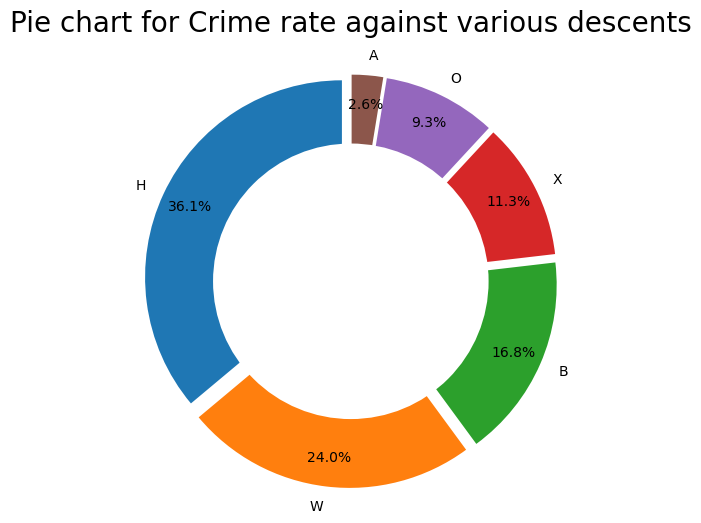

In [238]:
descent = df['Vict Descent'].value_counts()[:6].reset_index().rename(columns = {'index':'Descent','Vict Descent':'Crime Count'})
labels = descent['Descent']
descent['size'] = descent['Crime Count']/(descent['Crime Count'].sum())*100
sizes = descent['size']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  

plt.tight_layout()
plt.title('Pie chart for Crime rate against various descents', fontsize = 20, y=1.05)
plt.show()

### Stripplot to show a correlation between Victim's Age and Sex

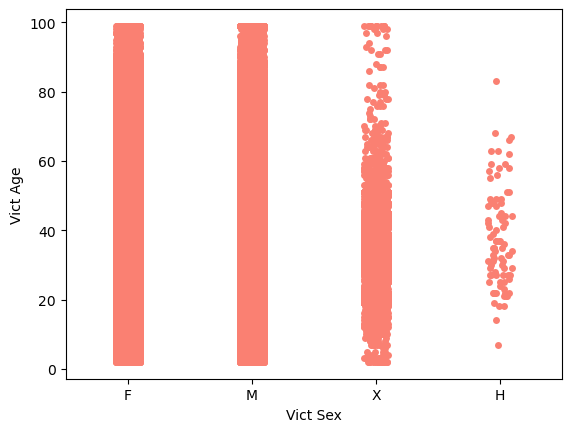

In [239]:
sns.stripplot(data = df.loc[~df['Vict Sex'].isnull()], x = "Vict Sex", y = "Vict Age", color = 'salmon')
plt.show()

### Stripplot to show a correlation between Victim's Age and Descent

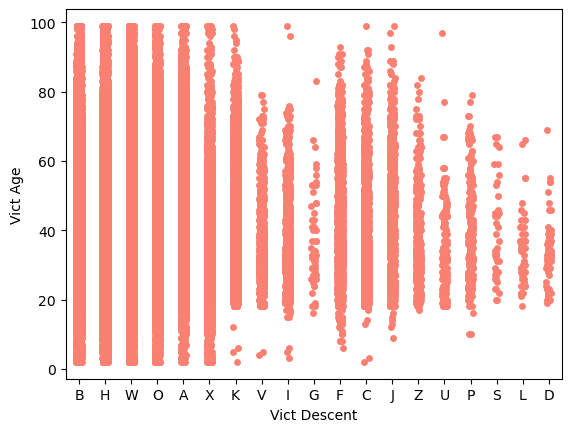

In [240]:
sns.stripplot(data = df.loc[~df['Vict Descent'].isnull()], x = "Vict Descent", y = "Vict Age", color = 'salmon')
plt.show()

### Timeseries forecasting for next 90 days

C:\Users\karni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\karni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\karni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\karni\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\karni\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

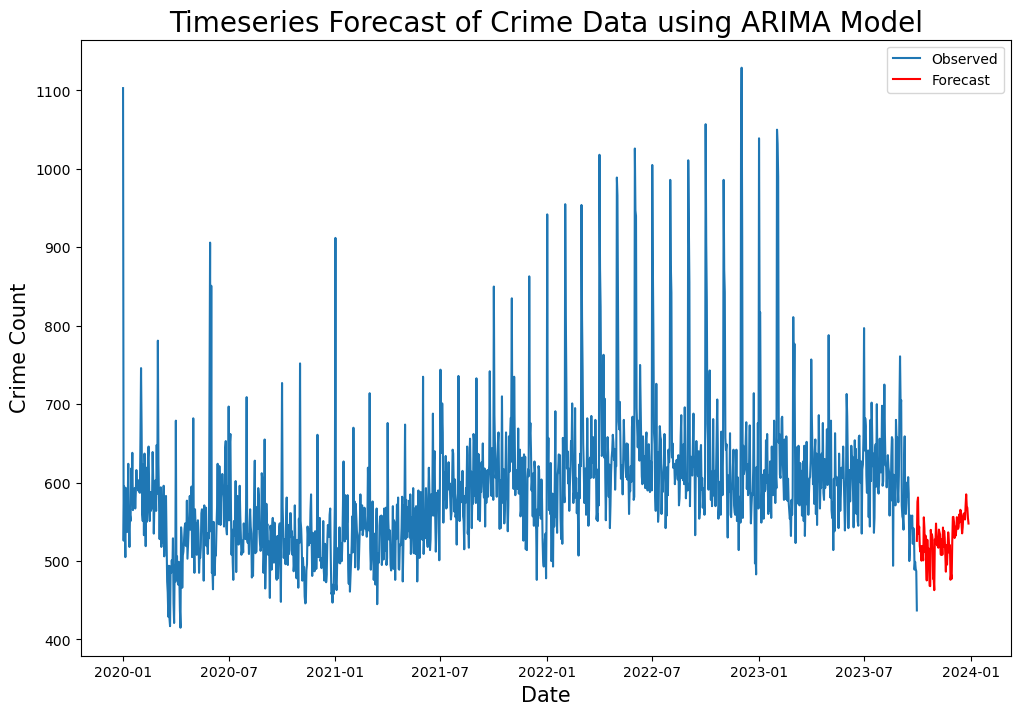

In [241]:
from statsmodels.tsa.arima.model import ARIMA

df_ts = df.loc[df['DATE OCC'] < '2023-10-01']
df_ts = df_ts.groupby('DATE OCC').size().reset_index(name='COUNT')
df_ts = df_ts.set_index('DATE OCC')

model = ARIMA(df_ts, order=(1, 0, 100))
model_fit = model.fit()

forecast_days = 90
forecast = model_fit.forecast(steps=forecast_days)
forecast_dates = pd.date_range(start=df_ts.index[-1], periods=forecast_days)

plt.figure(figsize=(12, 8))
plt.plot(df_ts.index, df_ts['COUNT'], label='Observed')
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Crime Count', fontsize = 15)
plt.legend()
plt.title('Timeseries Forecast of Crime Data using ARIMA Model', fontsize = 20)
plt.show()

### Correlation between Crime Rate and Unemployment Rate

In [242]:
df_unemp = pd.read_csv('unemployment_data_2020_to_2023.csv').rename(columns = {'Month' : 'month_num', 'Year' : 'year'})
df_unemp = df_unemp[['year','month_num','unemployment_rate']]
df_unemp.head()

,year,month_num,unemployment_rate
0,2020,1,4.9
1,2020,2,4.9
2,2020,3,6.7
3,2020,4,17.0
4,2020,5,19.0


In [243]:
df_group = df_group.sort_values(by = ['year','month_num']).reset_index()
del df_group['index']
df_group = df_group.merge(df_unemp, left_on = ['year','month_num'], right_on = ['year','month_num'])
df_group['month_year'] = df_group['month']+'_'+df_group['year'].astype(str)

#### Unemployment Rate in LA since 2020

C:\Users\karni\AppData\Local\Temp\ipykernel_25240\489782990.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  unemp_plot.set_xticklabels(unemp_plot.get_xticklabels(), rotation = 90, fontsize =8)


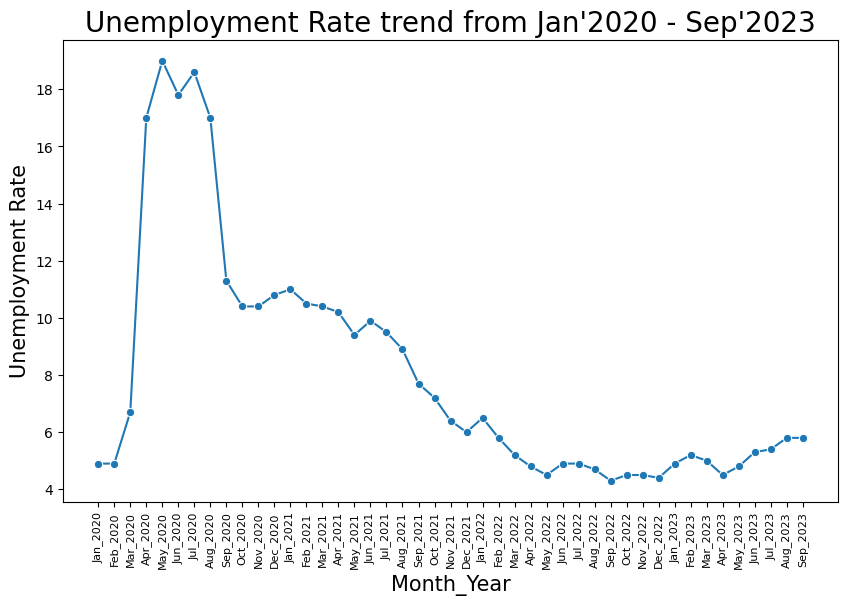

In [244]:
plt.figure(figsize = (10,6))
unemp_plot = sns.lineplot(x = 'month_year', y = 'unemployment_rate', data = df_group, marker = 'o')
unemp_plot.set_xticklabels(unemp_plot.get_xticklabels(), rotation = 90, fontsize =8)
plt.title('Unemployment Rate trend from Jan\'2020 - Sep\'2023', fontsize = 20)
plt.xlabel('Month_Year', fontsize = 15)
plt.ylabel('Unemployment Rate', fontsize = 15)
plt.show()

C:\Users\karni\AppData\Local\Temp\ipykernel_25240\596077223.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_group.corr()


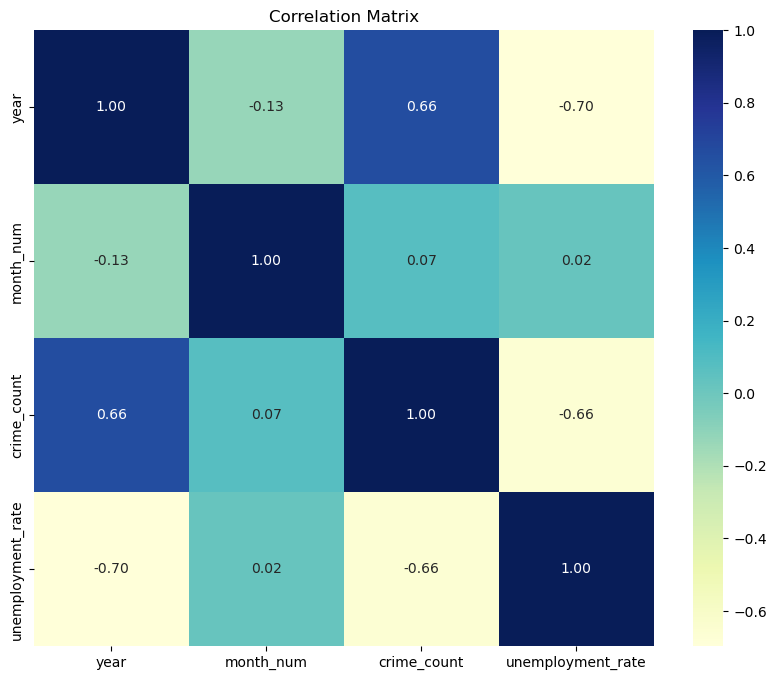

In [245]:
corr_matrix = df_group.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

###### Last updated on 2023-11-03